Hyperparameter tuning 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


In [23]:
# load data
data_model2 = pd.read_csv('data_model_with_features4.csv')
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data_model2.drop(columns=['label']), data_model2['label'], test_size=0.2, random_state=42)
# oversampling 
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Random Forest

In [5]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [6]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_over, y_over)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, verbose=2)

In [10]:
y_pred = rf_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.55      0.69       123
           2       0.74      0.92      0.82       531
           3       0.87      0.66      0.75       346

    accuracy                           0.79      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.81      0.79      0.78      1000



In [8]:
rf_random.best_params_

{'n_estimators': 83,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

# LDA

In [8]:
data2 = pd.read_csv('data_model_with_features4_clustering_tfidf.csv')

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['label']), data2['label'], test_size=0.2, random_state=42)
# oversampling 
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_over, y_over)

LinearDiscriminantAnalysis()

In [11]:
from sklearn.metrics import f1_score, precision_score, recall_score, cohen_kappa_score,accuracy_score

def print_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average="weighted")
    recall = recall_score(y_test, y_pred,average="weighted")
    f1 =  f1_score(y_test, y_pred,average="weighted")
    kappa = cohen_kappa_score(y_test, y_pred, weights="quadratic")
    return [np.round(x,3) for x in [acc,precision,recall,f1,kappa]]

In [12]:
# performance
y_pred = clf.predict(X_test)
LDA_simple = print_metrics(y_test, y_pred)
print(LDA_simple)
print(classification_report(y_test, y_pred))

[0.553, 0.586, 0.553, 0.56, 0.464]
              precision    recall  f1-score   support

           1       0.32      0.58      0.41       123
           2       0.64      0.49      0.56       531
           3       0.60      0.64      0.62       346

    accuracy                           0.55      1000
   macro avg       0.52      0.57      0.53      1000
weighted avg       0.59      0.55      0.56      1000



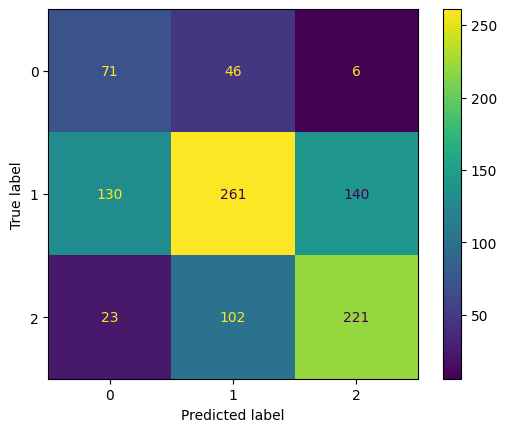

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)#, display_labels = [False, True])
cm_display.plot()
plt.show()

# QDA

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_over, y_over)

C:\Users\JoaquinFarina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

[0.531, 0.282, 0.531, 0.368, 0.0]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           2       0.53      1.00      0.69       531
           3       0.00      0.00      0.00       346

    accuracy                           0.53      1000
   macro avg       0.18      0.33      0.23      1000
weighted avg       0.28      0.53      0.37      1000



C:\Users\JoaquinFarina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoaquinFarina\anaconda3\lib\site-pa

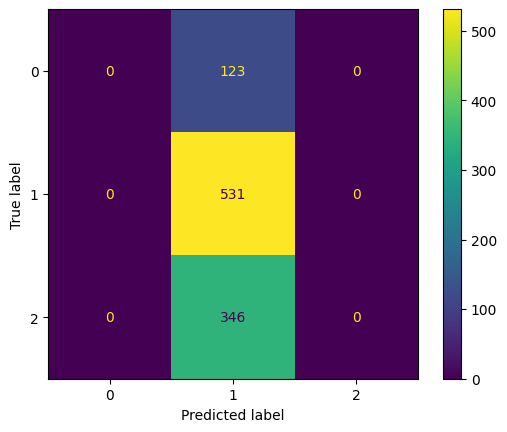

In [17]:
# performance
y_pred = clf.predict(X_test)
LQA_simple = print_metrics(y_test, y_pred)
print(LQA_simple)
print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)#, display_labels = [False, True])
cm_display.plot()
plt.show()

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_over, y_over)
# performance
y_pred = neigh.predict(X_test)
KNN_model_simple = print_metrics(y_test, y_pred)
print(KNN_model_simple)
print(classification_report(y_test, y_pred))

[0.59, 0.6, 0.59, 0.59, 0.52]
              precision    recall  f1-score   support

           1       0.49      0.64      0.56       123
           2       0.66      0.52      0.58       531
           3       0.56      0.68      0.61       346

    accuracy                           0.59      1000
   macro avg       0.57      0.61      0.58      1000
weighted avg       0.60      0.59      0.59      1000



# G NB

In [26]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_over, y_over)
# performance
y_pred = clf.predict(X_test)
NB_model_simple = print_metrics(y_test, y_pred)
print(NB_model_simple)
print(classification_report(y_test, y_pred))

[0.906, 0.908, 0.906, 0.905, 0.883]
              precision    recall  f1-score   support

           1       0.96      0.73      0.83       123
           2       0.90      0.93      0.91       531
           3       0.90      0.94      0.92       346

    accuracy                           0.91      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.91      0.91      0.90      1000



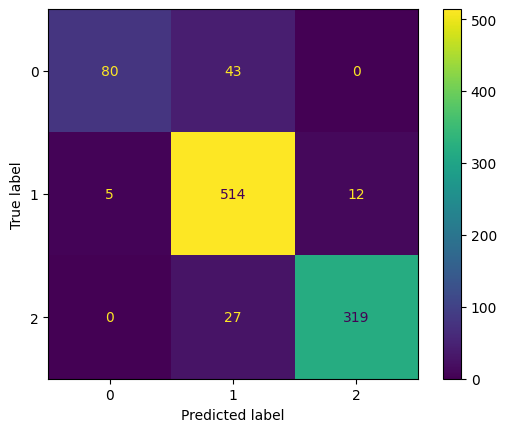

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_over, y_over)

gs_NB.best_params_

In [31]:
y_pred = gs_NB.predict(X_test)
NB_model_simple = print_metrics(y_test, y_pred)
print(NB_model_simple)
print(classification_report(y_test, y_pred))

[0.944, 0.945, 0.944, 0.943, 0.93]
              precision    recall  f1-score   support

           1       0.92      0.77      0.84       123
           2       0.92      0.98      0.95       531
           3       0.99      0.95      0.97       346

    accuracy                           0.94      1000
   macro avg       0.94      0.90      0.92      1000
weighted avg       0.95      0.94      0.94      1000

